In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#for setting random_state
seed=0

%matplotlib inline


In [2]:
#Read in data and view top rows
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


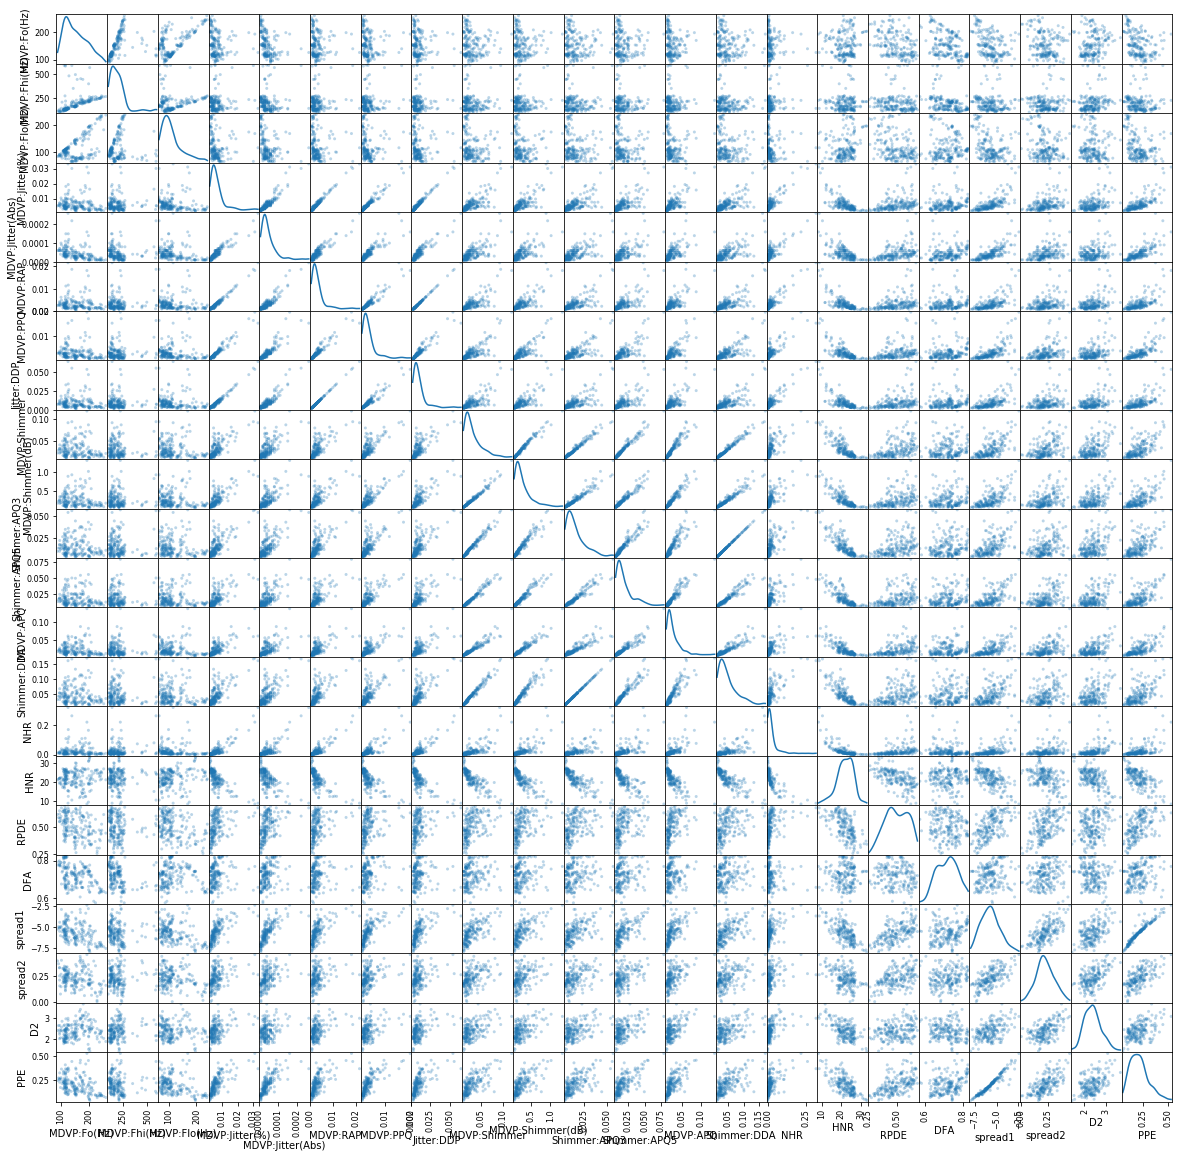

In [3]:
#Explore data and separate features from class labels
display(data.describe())
features = data.drop(['name','status'],1)
status = data['status']
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (20,20), diagonal = 'kde'); 

In [4]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, status, test_size=0.2, random_state=seed)

In [5]:
#scaling
#maybe try different scaling methods...
from sklearn import preprocessing

#Fit to training data
robust = preprocessing.RobustScaler()
train_features_scaled = pd.DataFrame(robust.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
#Use training data fit to scale test data
test_features_scaled = pd.DataFrame(robust.fit_transform(X_test), columns = X_test.columns, index = X_test.index)

In [6]:
#PCA
pca = PCA(n_components = 11)
pca.fit(train_features_scaled)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

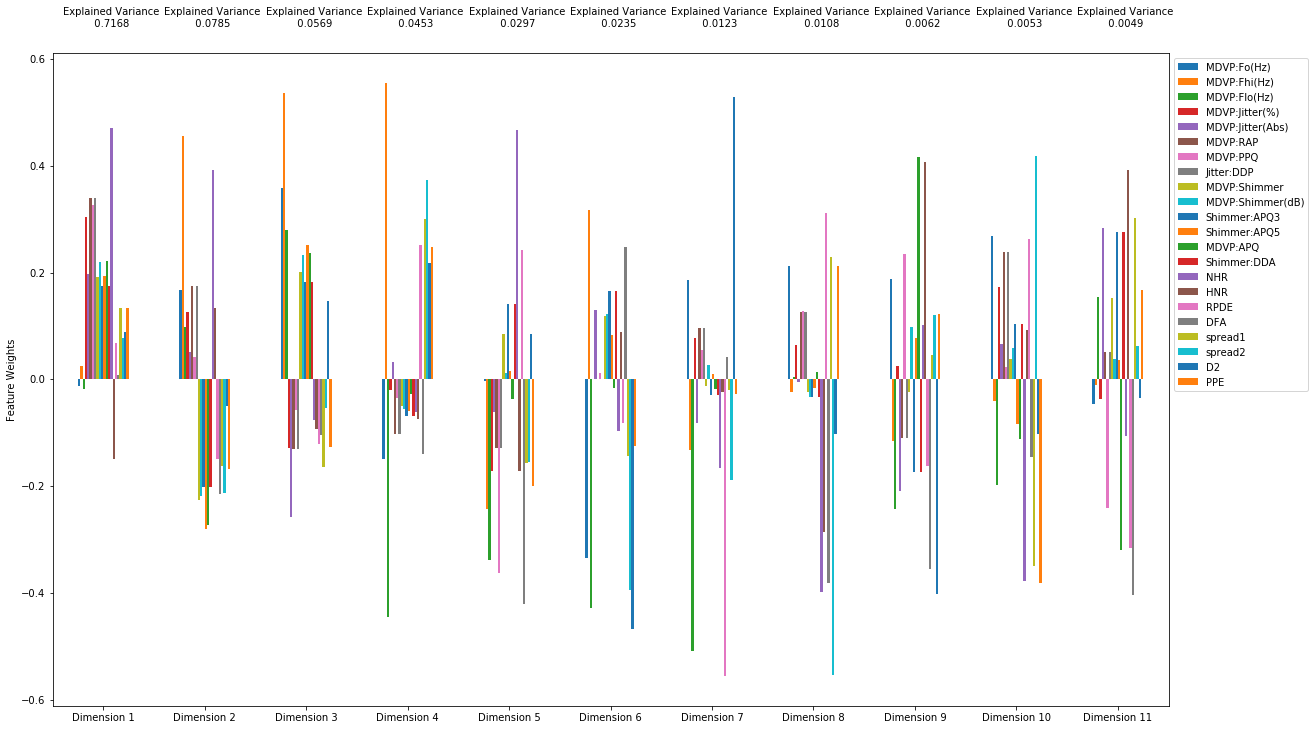

In [7]:
def pca_hist(data, pca, figsize):
    #Copied and modified from code provided for Udacity's MLND
    
    dim = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]
    comp = pd.DataFrame(np.round(pca.components_,4), columns = data.keys())
    comp.index = dim
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
    var_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Varaince'])

    fig, ax = plt.subplots(figsize = figsize)
    comp.plot(ax = ax, kind='bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dim,rotation=0)
    ax.legend(loc = 2, bbox_to_anchor = (1,1));

    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
        
pca_hist(train_features_scaled,pca,(20,12))

In [8]:
#First 4 dimensions account for ~90% of the variance
#May experiment using the 1st PC with different combos of the other PCs in the future 
pca = PCA(n_components = 4)
pca.fit(train_features_scaled)

pca_train = pd.DataFrame(pca.transform(train_features_scaled), 
                         columns = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)],
                         index = train_features_scaled.index)
pca_test = pd.DataFrame(pca.transform(test_features_scaled),
                        columns = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)],
                        index = test_features_scaled.index)

print pca_train.head()
print pca_test.head()

     Dimension 1  Dimension 2  Dimension 3  Dimension 4
26     -1.888579     0.413400    -0.196318     0.299513
139    -1.114386    -1.161229    -0.221785     0.093340
143    -1.743159     0.550495     0.367733     0.766961
71      2.550110    -1.132357    -0.047881     0.134614
8      -0.944722    -0.872363    -1.697460     0.627335
     Dimension 1  Dimension 2  Dimension 3  Dimension 4
83     -1.842248    -0.478627    -0.916167    -0.629948
12     -3.462016     0.644339    -0.085343    -0.288187
33     -4.653379     1.421554     0.776569    -1.522098
113    -1.808217     0.827930     0.681533     0.075156
171    -3.017006    -0.033496    -0.780928    -0.000953


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf_A = LogisticRegression(random_state = seed)
clf_B = LinearSVC(random_state = seed)
clf_C = GaussianProcessClassifier(random_state = seed)
clf_D = DecisionTreeClassifier(random_state = seed)
clf_E = KNeighborsClassifier()

models = [clf_A, clf_B, clf_C, clf_D, clf_E]


def train_predict(X_train, X_test, y_train, y_test, models):
    preds = {}
    for clf in models:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        preds[name] = clf.predict(X_test)
        
        print 'Results for {}:'.format(name)
        print 'Accuracy = {:.4f}'.format(accuracy_score(y_test, preds[name]))
        print 'Confusion matrix:'
        print confusion_matrix(y_test, preds[name])
        print classification_report(y_test, preds[name])

    
    return preds

print 'Using top 4 dimensions from PCA:'
preds_pca = train_predict(pca_train, pca_test, y_train, y_test, models)

Using top 4 dimensions from PCA:
Results for LogisticRegression:
Accuracy = 0.8718
Confusion matrix:
[[ 7  3]
 [ 2 27]]
             precision    recall  f1-score   support

          0       0.78      0.70      0.74        10
          1       0.90      0.93      0.92        29

avg / total       0.87      0.87      0.87        39

Results for LinearSVC:
Accuracy = 0.8974
Confusion matrix:
[[ 7  3]
 [ 1 28]]
             precision    recall  f1-score   support

          0       0.88      0.70      0.78        10
          1       0.90      0.97      0.93        29

avg / total       0.90      0.90      0.89        39

Results for GaussianProcessClassifier:
Accuracy = 0.9231
Confusion matrix:
[[ 8  2]
 [ 1 28]]
             precision    recall  f1-score   support

          0       0.89      0.80      0.84        10
          1       0.93      0.97      0.95        29

avg / total       0.92      0.92      0.92        39

Results for DecisionTreeClassifier:
Accuracy = 0.9487
Confusion

In [10]:
#Compare above with results of using all original features
print 'Using all 22 original features:'
preds = train_predict(X_train, X_test, y_train, y_test, models)

Using all 22 original features:
Results for LogisticRegression:
Accuracy = 0.8718
Confusion matrix:
[[ 7  3]
 [ 2 27]]
             precision    recall  f1-score   support

          0       0.78      0.70      0.74        10
          1       0.90      0.93      0.92        29

avg / total       0.87      0.87      0.87        39

Results for LinearSVC:
Accuracy = 0.2564
Confusion matrix:
[[10  0]
 [29  0]]
             precision    recall  f1-score   support

          0       0.26      1.00      0.41        10
          1       0.00      0.00      0.00        29

avg / total       0.07      0.26      0.10        39

Results for GaussianProcessClassifier:
Accuracy = 0.9231
Confusion matrix:
[[ 9  1]
 [ 2 27]]
             precision    recall  f1-score   support

          0       0.82      0.90      0.86        10
          1       0.96      0.93      0.95        29

avg / total       0.93      0.92      0.92        39

Results for DecisionTreeClassifier:
Accuracy = 0.8718
Confusion 

C:\Users\alros\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
